 - Objective:
  
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


Dataset Information-

The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate
class_type Numeric (integer values in range [1,7])

### Import Libraries

In [165]:
## import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

### Read Data

In [166]:
zoo_data = pd.read_csv("Zoo.csv")
zoo_data.shape

(101, 18)

### Initial Data Analysis

In [167]:
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [168]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [169]:
#drop unnecessary column
zoo_data.drop('animal name',axis=1,inplace=True)

In [170]:
zoo_data.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [171]:
zoo_data['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

### Data Preprocessing

In [172]:
zoo_data.shape

(101, 17)

In [173]:
## Divide dataset into x and y
x = zoo_data.iloc[:,:-1]
y = zoo_data['type']

In [174]:
x.shape

(101, 16)

In [175]:
## divide dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=35)

In [176]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [177]:
x_train.shape

(80, 16)

### Model Building

In [178]:
##define knn classifier
knn_clasifier = KNeighborsClassifier(n_neighbors=3)

In [179]:
#fit model on train data
knn_clasifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [180]:
y_pred_test = knn_clasifier.predict(x_test)

In [181]:
y_pred_train = knn_clasifier.predict(x_train)

In [182]:
## checking accuracy for test data
print("Accuracy Score",accuracy_score(y_test,y_pred_test))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))

Accuracy Score 0.9047619047619048
Confusion Matrix 
 [[9 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 1 1]]


In [183]:
## checking accuracy for train data
print("Accuracy Score",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix \n",confusion_matrix(y_train,y_pred_train))

Accuracy Score 0.9625
Confusion Matrix 
 [[32  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  1  3  0  0  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  2  6]]


In [184]:
# cfreate a loop to find best value of k
test_score = []

for i in range(1,16):
    knn_clasifier = KNeighborsClassifier(n_neighbors=i)
    knn_clasifier.fit(x_train,y_train)
    y_pred = knn_clasifier.predict(x_test)
    acuuracyScore = round(accuracy_score(y_test,y_pred),3)
    test_score.append(acuuracyScore)
  

In [185]:
test_score

[1.0,
 0.952,
 0.905,
 0.952,
 0.952,
 0.905,
 0.857,
 0.905,
 0.857,
 0.905,
 0.905,
 0.905,
 0.905,
 0.905,
 0.905]

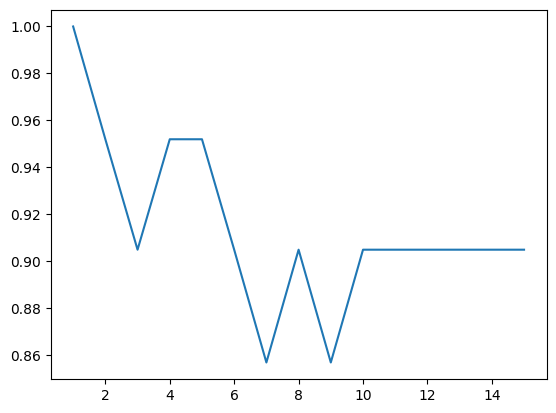

In [186]:
plt.plot(range(1,16),test_score)

In [187]:
knn_clasifier = KNeighborsClassifier(n_neighbors=5)
knn_clasifier.fit(x_train,y_train)

KNeighborsClassifier()

In [188]:
y_pred = knn_clasifier.predict(x_test)

In [189]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In this example we have achieved 95% accuracy by using the k value of 5.

### Visualize the Decision Boundary

In [190]:
x.shape

(101, 16)

In [197]:
## Generate sample data
x,y = make_classification(n_samples=100 ,n_features = 16, n_redundant=0,n_informative=8,
                          n_repeated=0,n_classes=7,random_state=42)

In [198]:
# Select two features for visualization 
x_selected = x[:, [0, 1]]

In [199]:
# Fit the KNN classifier on the selected features 
knn_clasifier = KNeighborsClassifier(n_neighbors=5)
knn_clasifier.fit(x_selected,y)

KNeighborsClassifier()

In [200]:
# Define filler values for the extra features
filler_values = [0] * 14
filler_range = [(0,1)]*14

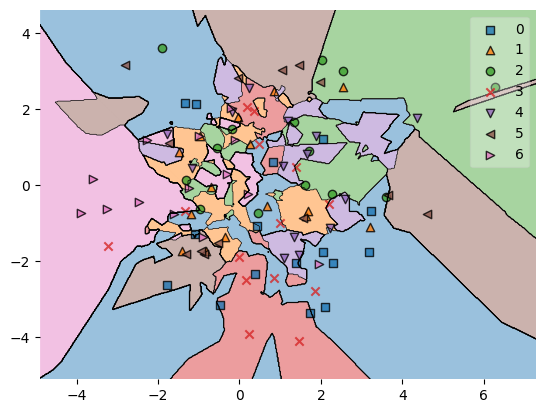

In [201]:
plot_decision_regions(x_selected,y,clf = knn_clasifier,
                      filler_feature_values=filler_values,filler_feature_ranges=filler_range)
plt.show()